<a href="https://colab.research.google.com/github/CeSaRLoPeZArTeAgA/SQL-SERVER/blob/main/SESI%C3%93N_6_Agrupamiento_y_Agregaci%C3%B3n_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

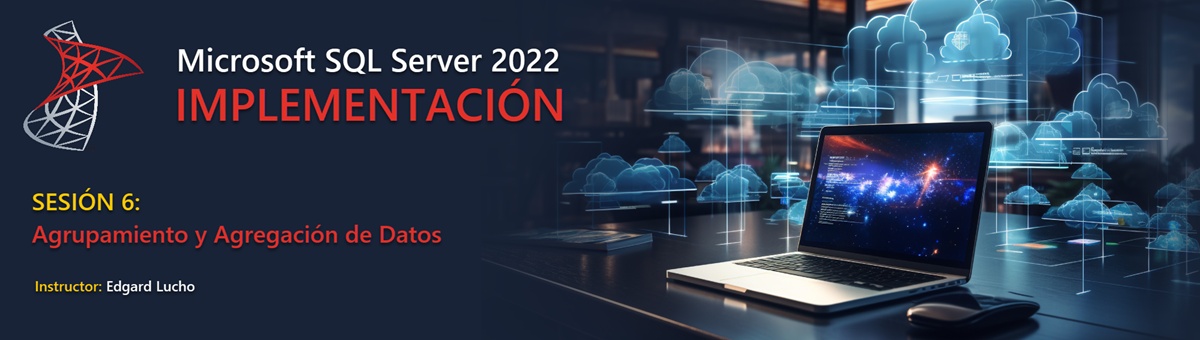

<table width='99%'>
<tr>
<td bgcolor='#005DA7'>

# **<font color="#FFFFFF">SESIÓN 6: Agrupamiento y Agregación de Datos</font>**

</td>
</tr>
</table>

<table width='99%'>
<tr>
<td bgcolor='#FFC901'>

## **<font color="#000000">🗹 GROUP BY</font>**

</td>
</tr>
</table>

La cláusula GROUP BY se utiliza para agrupar filas de una tabla según un criterio especificado.

Permite realizar operaciones de agregación, como sumas, promedios, recuentos, entre otros, en conjuntos de datos que pertenecen a cada grupo.

Cuando se utiliza la cláusula GROUP BY, los registros se agrupan en conjuntos basados en los valores de una o varias columnas.

Luego, se pueden aplicar funciones de agregación, como COUNT, SUM, AVG, MAX, MIN, entre otras, a las columnas que no se incluyen en la cláusula GROUP BY.



```
-- Contar el número total de productos en la tabla
-- Products
USE Northwind
GO
SELECT COUNT(*) AS [Cantidad de productos]
FROM Products
GO
```





```
-- Contar el número de pedidos realizados por cada
-- cliente en la tabla Orders ordenado en forma
-- descendente por la cantidad
USE Northwind
GO
SELECT CustomerID AS Cliente, COUNT(*) AS Cantidad
FROM Orders
GROUP BY CustomerID
ORDER BY 2 DESC
GO
```



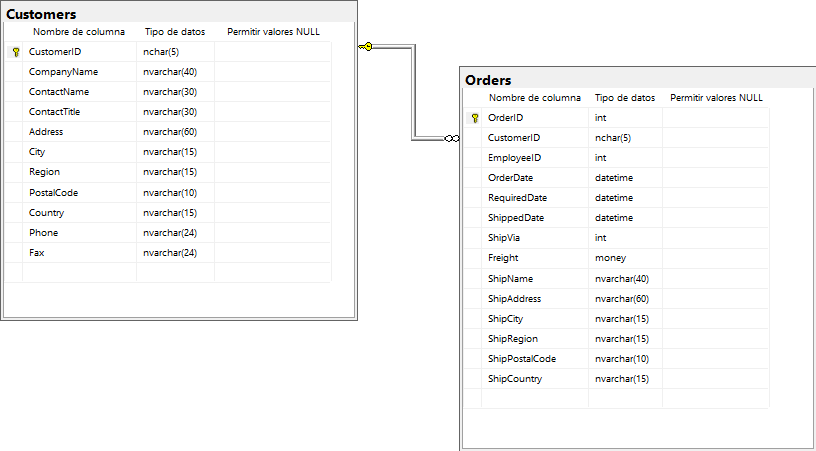



```
-- Contar el número de pedidos realizados por cada
-- cliente en la tabla Orders ordenado en forma
-- descendente por la cantidad
USE Northwind
GO
SELECT c.CompanyName AS Cliente, COUNT(*) AS Cantidad
FROM Customers c
INNER JOIN Orders o
ON c.CustomerID = o.CustomerID
GROUP BY c.CompanyName
ORDER BY 2 DESC
GO
```





```
/*
OTI_COMERCIAL: ¿Quienes son nuestros 5 clientes que nos han dado
la mayor utilidad.
*/
USE OTI_COMERCIAL
GO
SELECT TOP 5
	c.Apellidos + ' ' + c.Nombre AS Cliente,
	CONVERT(DECIMAL(9,2),SUM(dp.Cantidad*(dp.Precio*(1-dp.Descuento)-prd.[Costo estándar]))) AS Utilidad
FROM Ventas.Clientes c
INNER JOIN Ventas.Pedidos p
ON c.Id=p.[Id de cliente]
INNER JOIN Ventas.[Detalles de pedido] dp
ON p.[Id de pedido]=dp.[Id de pedido]
INNER JOIN Almacen.Productos prd
ON prd.Id=dp.[Id de producto]
GROUP BY c.Apellidos + ' ' + c.Nombre
ORDER BY 2 DESC
GO
```



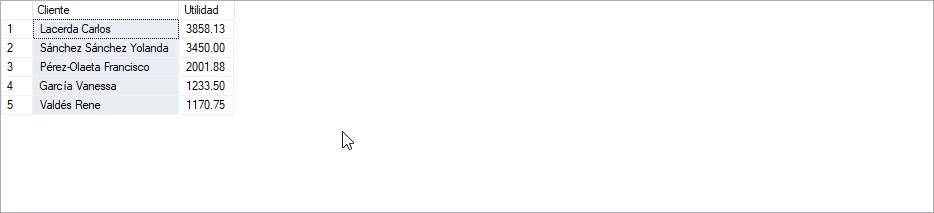



```
/*
OTI_COMERCIAL: ¿Quienes son nuestros 5 clientes que nos han dado
la mayor utilidad.
*/
USE OTI_COMERCIAL
GO
SELECT
	c.Apellidos + ' ' + c.Nombre AS Cliente,
	YEAR(p.[Fecha de pedido]) AS Año,
	CONVERT(DECIMAL(9,2),SUM(dp.Cantidad*(dp.Precio*(1-dp.Descuento)-prd.[Costo estándar]))) AS Utilidad
FROM Ventas.Clientes c
INNER JOIN Ventas.Pedidos p
ON c.Id=p.[Id de cliente]
INNER JOIN Ventas.[Detalles de pedido] dp
ON p.[Id de pedido]=dp.[Id de pedido]
INNER JOIN Almacen.Productos prd
ON prd.Id=dp.[Id de producto]
GROUP BY
	YEAR(p.[Fecha de pedido]),
	c.Apellidos + ' ' + c.Nombre
	--ORDER BY 2 DESC
ORDER BY 2, 3 DESC
GO
```



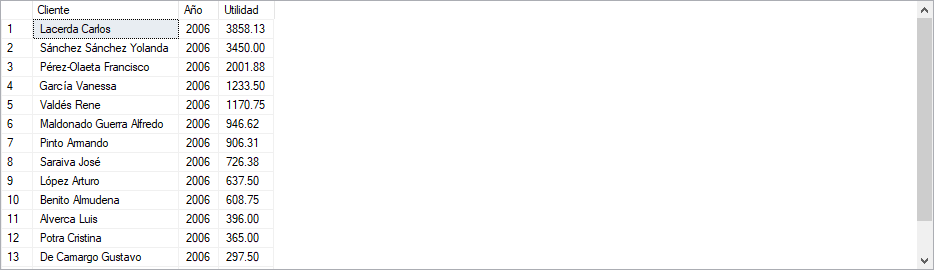

1.	Mostrar de la tabla Orders, para los pedidos cuya diferencia entre la fecha de despacho y la fecha de la orden sea mayor a 4 semanas, las siguientes columnas:
OrderId, CustomerId, Orderdate, Shippeddate, diferencia en días, diferencia en semanas y diferencia en meses entre ambas fechas.




```
/*
1.	Mostrar de la tabla Orders, para los pedidos cuya diferencia
entre la fecha de despacho y la fecha de la orden sea mayor a 4 semanas,
las siguientes columnas: OrderId, CustomerId, Orderdate, Shippeddate,
diferencia en días, diferencia en semanas y diferencia en meses entre ambas fechas.
*/
USE Northwind
GO
SELECT
	OrderId, CustomerId, Orderdate, Shippeddate,
	DATEDIFF(DAY,Orderdate, Shippeddate) AS [Diferencia den días],
	DATEDIFF(DAY,Orderdate, Shippeddate)/7.0 AS [Diferencia en semanas],
	DATEDIFF(WEEK,Orderdate, Shippeddate) AS [Diferencia en semanas],
	DATEDIFF(DAY,Orderdate, Shippeddate)/30 AS [Diferencia en meses],
	DATEDIFF(MONTH,Orderdate, Shippeddate) AS [Diferencia en meses]
FROM Orders
WHERE DATEDIFF(DAY,Orderdate, Shippeddate)/7 > 4
```



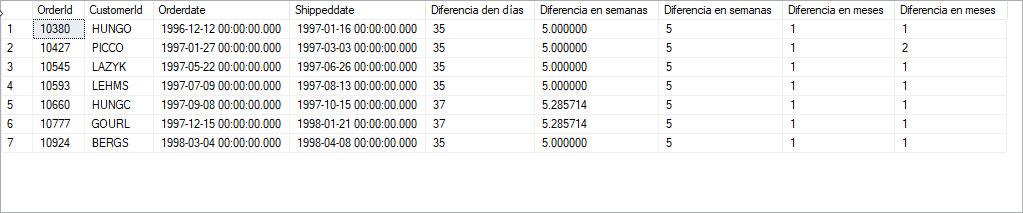

2.	La empresa tiene como política otorgar a los jefes una comisión del 0.5% sobre la venta de sus subordinados.  Calcule la comisión mensual que le ha correspondido a cada jefe por cada año (basándose en la fecha de la orden) según las ventas que figuran en la base de datos. Muestre el código del jefe, su apellido, el año y mes de cálculo, el monto acumulado de venta de sus subordinados, y la comisión obtenida.





```
/*
2.	La empresa tiene como política otorgar a los jefes una comisión del 0.5%
sobre la venta de sus subordinados.

Calcule la comisión mensual que le ha correspondido a cada jefe por cada año
(basándose en la fecha de la orden) según las ventas que figuran en la base de datos.

Muestre el código del jefe, su apellido, el año y mes de cálculo, el monto acumulado
de venta de sus subordinados, y la comisión obtenida.
*/

USE Northwind
GO
SELECT j.EmployeeID,j.LastName,e.EmployeeID,e.LastName
FROM Employees j
INNER JOIN Employees e
ON j.EmployeeID = e.ReportsTo
ORDER BY 1, 3 ASC
```





```
/*
2.	La empresa tiene como política otorgar a los jefes una comisión del 0.5%
sobre la venta de sus subordinados.

Calcule la comisión mensual que le ha correspondido a cada jefe por cada año
(basándose en la fecha de la orden) según las ventas que figuran en la base de datos.

Muestre el código del jefe, su apellido, el año y mes de cálculo, el monto acumulado
de venta de sus subordinados, y la comisión obtenida.
*/

USE Northwind
GO
SELECT
	j.EmployeeID,j.LastName,
	YEAR(o.OrderDate) AS Año,
	DATENAME(MONTH,o.OrderDate) AS Mes,
	CONVERT(DECIMAL(19,2),SUM(od.Quantity*od.UnitPrice*(1-od.Discount))) AS Monto,
	CONVERT(DECIMAL(19,2),0.5*SUM(od.Quantity*od.UnitPrice*(1-od.Discount))/100.0) AS Comisión
FROM Employees j
INNER JOIN Employees e
ON j.EmployeeID = e.ReportsTo
INNER JOIN Orders o
ON e.EmployeeID= o.EmployeeID
INNER JOIN [Order Details] od
ON o.OrderID = od.OrderID
GROUP BY
	j.EmployeeID,
	j.LastName,
	YEAR(o.OrderDate),
	MONTH(o.OrderDate),
	DATENAME(MONTH,o.OrderDate)
ORDER BY 3, MONTH(o.OrderDate) ASC
```



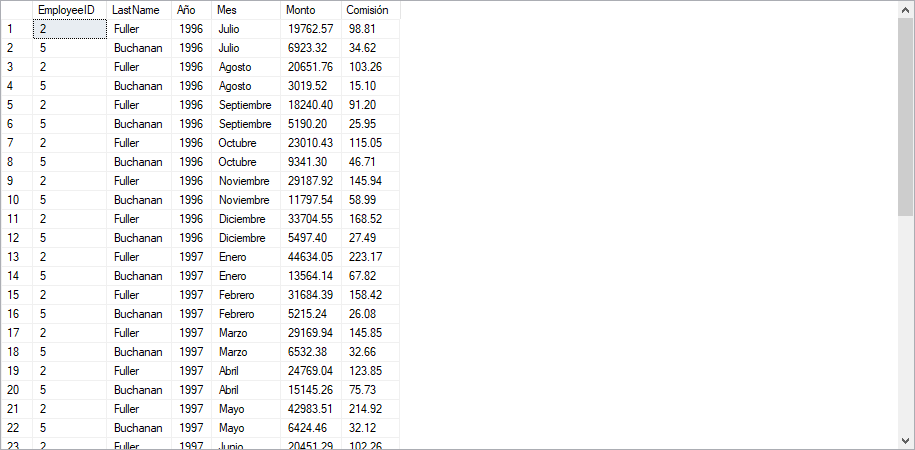